# 第7章 分類2:客船沈没事故での生存予測

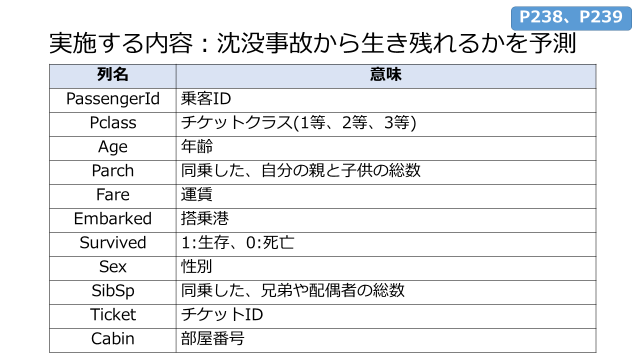

## これまでの知識でモデル作成  

'Survived.csv'を読み込み、Survived列の内容を予測する決定木モデルを作成します。  

**問1**  
(1) CSVファイルをデータフレームに読み込んで、先頭5行を表示してください


In [ ]:
# pandas、決定木、train_test_split関数のインポート
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split

# matplotlibの図をセルに表示するための設定
%matplotlib inline

# 'Survived.csv'の読み込み
df = pd.read_csv('Survived.csv')

# 先頭5行の確認
df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


▶実行結果  
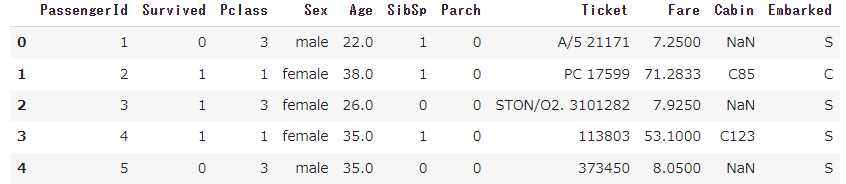

(2)各列の欠損値の個数を表示してください。また、データフレームの行数、列数を表示してください。

In [ ]:
# 各列の欠損値の個数を表示する
print(df.isnull().sum())

# データフレームの行数、列数を表示する
print('行数、列数', df.shape)

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
行数、列数 (891, 11)


▶実行結果  
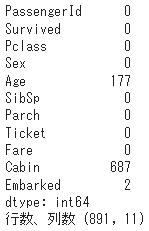

(3) Cabin列は欠損値が多すぎるため、使用しないことにします。  
他の列の欠損値への対処として、Age列は平均値で、Embarked列は最頻値で穴埋めしてください。  
穴埋め後、各列の欠損値の個数を表示して、欠損値が穴埋めされたことを確認してください。  

**注意**  
最頻値modeは複数返ってくる可能性があるもののため、**1つ目だけ**を取得して使用する必要があります

In [ ]:
# Age列を平均値で穴埋めする
df["Age"] = df["Age"].fillna(df["Age"].mean())

# Embarked列を最頻値で穴埋めする
df["Embarked"] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# 各列の欠損値の個数を表示する
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64


▶実行結果  
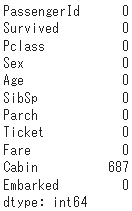

(4) データフレームから特徴量xと正解データtを抽出してください。  
特徴量は'Pclass','Age','SibSp','Parch','Fare'とします。  


In [ ]:
# 特徴量を変数xに代入する
x = df[['Pclass','Age','SibSp','Parch','Fare']]

# 正解データを変数tに代入する
t = df['Survived']

(5)特徴量xと正解データtを、以下の条件で訓練データとテストデータに分割してください。
* テストデータは20%とします。
* 乱数シードは0とする
* 特徴量のうち訓練データはx_trainに代入する 
* 特徴量のうちテストデータはx_testに代入する 
* 正解データのうち訓練データはy_trainに代入する 
* 正解データのうちテストデータはy_testに代入する 

In [ ]:
# 特徴量x、正解データtを、訓練データとテストデータに分割する
x_train,x_test,y_train,y_test = train_test_split(x, t, test_size = 0.2,random_state = 0)

# x_trainの行数、列数を表示する
x_train.shape

(712, 5)

▶実行結果  
(712, 5)

(6)訓練データでモデルに学習させ、訓練データとテストデータでの正解率を表示してください。

In [ ]:
# 決定木モデルをmodelという名前で作成する
model = tree.DecisionTreeClassifier(max_depth = 5, random_state = 1)

# 訓練データでモデルに学習させる
model.fit(x_train, y_train)

# 訓練データでの正解率を表示する
print('訓練データでの正解率:',model.score(x_train, y_train))

# テストデータでの正解率を表示する
print('テストデータでの正解率:',model.score(x_test, y_test))

訓練データでの正解率: 0.7485955056179775
テストデータでの正解率: 0.7430167597765364


▶実行結果  
訓練データでの正解率: 0.7485955056179775  
テストデータでの正解率: 0.7430167597765364

### 参考

(1)  
* コード5-1

(2)
* コード5-6
* コード4-3

(3)
* コード5-16
* 表5-1

(4)
* コード5-17

(5)
* コード5-20

(6)
* コード5-18
* コード5-22


# 7.2 データの前処理

## データごとの出現回数のカウント : 不均衡データかどうかチェック ★

コード7-2 Survived列のデータ(P241)

In [ ]:
# dfのSurvived列のデータごとの出現回数を表示する
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

▶実行結果  
0    549  
1    342  
Name: Survived, dtype: int64

0:死亡者数と1:生存者数に1.6倍の差がある

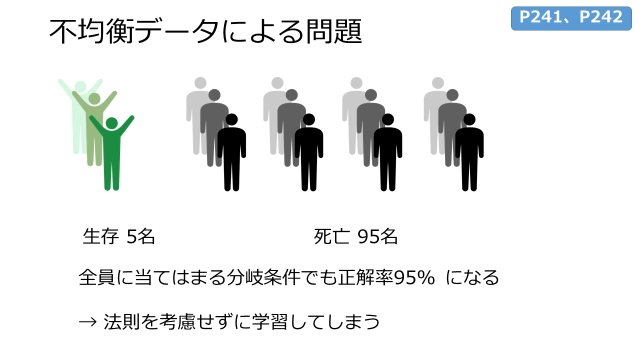

## 外れ値への対処(今回はなし)

**決定木モデルは外れ値の影響を受けにくい**  
そのため、今回は何も実施しない

# 7.3 モデルの作成と学習

**不均衡データに対処する決定木モデルを作成する**

tree.DecisionTreeClassifier(**class_weight='balanced'**)

**class_weight='balanced'**  
不均衡データに対処するための設定。  
分岐条件を考える際、データの比率を考慮しながら調整することで、予測性能の良いモデルを作れる可能性を高める。

コード7-8 モデルの作成と学習(P248) ★

In [ ]:
# データの比率を考慮した決定木モデルをmodel2という名前で作成する
# 木の深さは5、乱数シードは0とする
model2 = tree.DecisionTreeClassifier(max_depth = 5, random_state = 0, class_weight='balanced')

# 訓練データでモデルに学習させる
model2.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

▶実行結果  
DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=0)

# 7.4 モデルの評価

コード7-9 決定木モデルの正解率を計算する(P249)

In [ ]:
# 訓練データでの正解率を表示する
print('訓練データでの正解率:',model2.score(x_train, y_train))

# テストデータでの正解率を表示する
print('テストデータでの正解率:',model2.score(x_test, y_test))

訓練データでの正解率: 0.7219101123595506
テストデータでの正解率: 0.7374301675977654


▶実行結果  
訓練データでの正解率: 0.7219101123595506  
テストデータでの正解率: 0.7374301675977654

**問2**  
最初に作成した【データの偏りを考慮していないモデル】で、テストデータの「生存」だけのデータで正解率を表示してください

In [ ]:
# df[Ture/Falseのシリーズ(リスト)] で、特定行を抽出する方法を使用する
# 生存(Survived列 == 1)かどうかをTrue/Falseで示すシリーズを得る
flg = (y_test == 1)

# x_testから「生存」だけ(上記シリーズのTrueだけ)を取得し、先頭5行を表示する
print(x_test[flg].head())

# x_testの「生存」だけのデータ、y_testの「生存」だけのデータ、を使って、modelでの正解率を表示する
print(model.score(x_test[flg], y_test[flg]))

     Pclass        Age  SibSp  Parch      Fare
31        1  29.699118      1      0  146.5208
255       3  29.000000      0      2   15.2458
298       1  29.699118      0      0   30.5000
609       1  40.000000      0      0  153.4625
318       1  31.000000      0      2  164.8667
0.5072463768115942


▶実行結果  
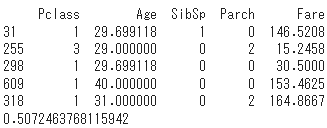

**問3**  
【データの偏りを考慮したモデル】で、テストデータの「生存」だけの正解率を表示する

In [ ]:
# (問2のflgを使用する)
# x_testの「生存」だけのデータ、y_testの「生存」だけのデータ、を使って、model2での正解率を表示する
print(model2.score(x_test[flg], y_test[flg]))

0.7391304347826086


▶実行結果  
0.7391304347826086

## 過学習

**問4**  
深さ14の決定木モデルを作り、訓練データとテストデータの正解率を表示してください

In [ ]:
# （コード7-8、7-9を流用できる）
# データの比率を考慮した決定木モデルをmodel3という名前で作成する
# 木の深さは14、乱数シードは0とする
model3 = tree.DecisionTreeClassifier(max_depth = 14, random_state = 0, class_weight ='balanced')

# 訓練データでモデルに学習させる
model3.fit(x_train, y_train)

# 訓練データでの正解率を表示する
print('訓練データでの正解率:', model3.score(x_train, y_train))

# テストデータでの正解率を表示する
print('テストデータでの正解率:',model3.score(x_test, y_test))

訓練データでの正解率: 0.9199438202247191
テストデータでの正解率: 0.6536312849162011


▶実行結果  
訓練データでの正解率: 0.9199438202247191  
テストデータでの正解率: 0.6536312849162011

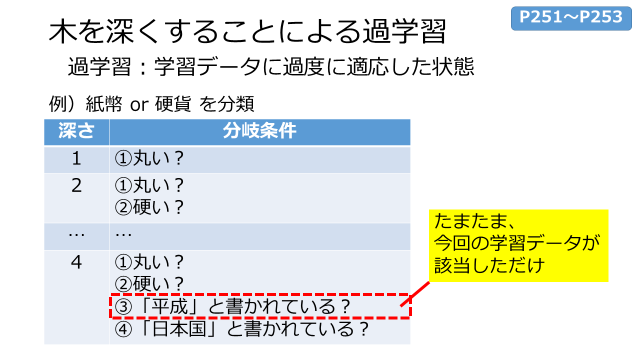

**過学習を避けながら予測性能を上げる方法**
* データの数を増やす
* 前処理の仕方を変える
* モデルの学習時の設定を変える
* 分析手法を変える

特徴量や木の深さを変えながら性能を確認していくため、一連の流れを関数にしておく

コード7-10 learn関数を定義する(P250)

In [ ]:
# 以下の関数を定義する

# 引数として、特徴量、正解データ、決定木の深さを受け取る
# 以下の手順を行う
# ① 特徴量、正解データを  訓練データ、テストデータに分割する
# ② 決定木のモデル(不均衡データを考慮しておく)を作成する
# ③ 訓練データでモデルに学習させる
# ④ 訓練データ、テストデータそれぞれの正解率を求める

# 戻り値として、訓練データの正解率、テストデータの正解率、学習済みモデルを返す

def learn(x, t,depth=3):
  # ①
  x_train, x_test, y_train, y_test = train_test_split(x, t,test_size = 0.2,random_state = 0)

  # ②
  model = tree.DecisionTreeClassifier(max_depth =depth,random_state = 0,class_weight="balanced")

  # ③
  model.fit(x_train,y_train)

  # ④
  score=model.score(X=x_train,y=y_train)
  score2=model.score(X=x_test,y=y_test)

  # 結果を返す ※複数の戻り値を返している
  return round(score, 3), round(score2, 3), model

コード7-11 木の深さによる正解率の変化を確認(P251)

In [ ]:
# for文を使い、木の深さを1～14まで変えながら、訓練データとテストデータの正解率の変化を確認する
for j in range(1, 15):
    # xは特徴量、tは正解データ
    train_score, test_score, model = learn(x, t, depth = j)
    print( "深さ{}:訓練データの正解率{} テストデータの正解率{}".format(j, train_score, test_score) )

深さ1:訓練データの正解率0.659 テストデータの正解率0.704
深さ2:訓練データの正解率0.699 テストデータの正解率0.732
深さ3:訓練データの正解率0.704 テストデータの正解率0.737
深さ4:訓練データの正解率0.698 テストデータの正解率0.726
深さ5:訓練データの正解率0.722 テストデータの正解率0.737
深さ6:訓練データの正解率0.77 テストデータの正解率0.698
深さ7:訓練データの正解率0.771 テストデータの正解率0.648
深さ8:訓練データの正解率0.781 テストデータの正解率0.631
深さ9:訓練データの正解率0.83 テストデータの正解率0.704
深さ10:訓練データの正解率0.851 テストデータの正解率0.687
深さ11:訓練データの正解率0.878 テストデータの正解率0.676
深さ12:訓練データの正解率0.892 テストデータの正解率0.654
深さ13:訓練データの正解率0.909 テストデータの正解率0.654
深さ14:訓練データの正解率0.92 テストデータの正解率0.654


## 欠損値の再埋め込み

前処理の仕方を変える  
→ Age列の欠損値を平均値で穴埋めしたが、更に良い方法はないか？

In [ ]:
# 前処理を改善する用にデータフレームを変数df2として読み込み直す
df2 = pd.read_csv('Survived.csv')

### Group By

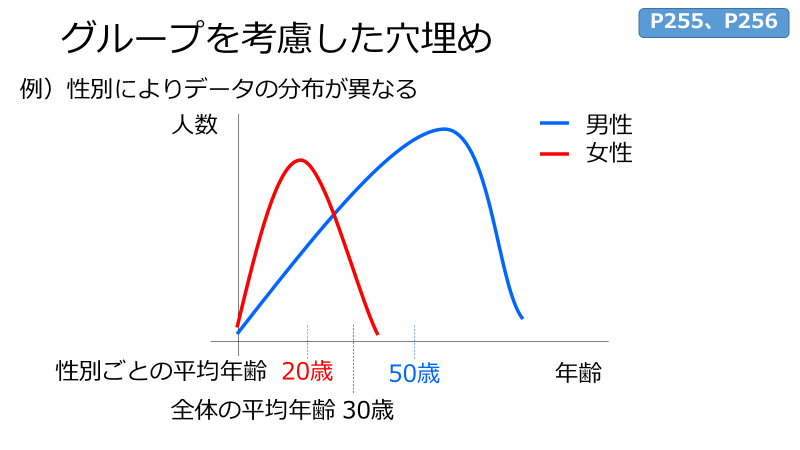

**基準列の値ごとに集計する**  
df**.groupby('基準とする列名').集計メソッド()**  


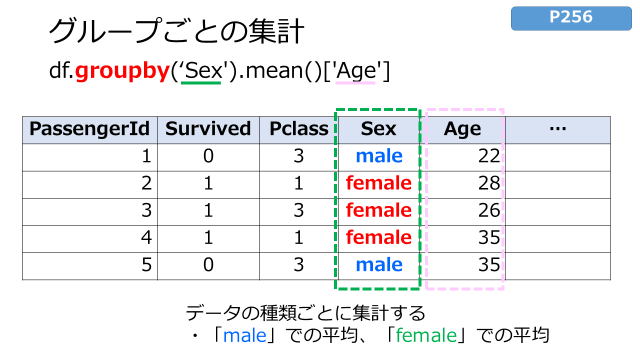

**問5**

|Id|クラス|性別|点数|
|---:|:---:|:---:|---:|
|1|1組|男|10|
|2|1組|男|5|
|3|1組|女|15|
|4|2組|女|15|
|5|2組|女|20|
|6|2組|男|5|



(1) 上記の表で、「クラス」を基準に、「点数」の合計を求めた場合、どのような結果になるか
* クラス[1]組の合計は[30]点  
* クラス[2]組の合計は[40]点

(2) 上記の表で、「性別」を基準に、「点数」の合計を求めた場合、どのような結果になるか  
* 性別[男]の合計は[20]点  
* 性別[女]の合計は[50]点

コード7-13 小グループ作成の基準となる列を指定(P256)

In [ ]:
# Survived列を基準に、Age列の平均値を表示する
df2.groupby('Survived').mean()['Age']

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

Survived  
0    30.626179  
1    28.343690  
Name: Age, dtype: float64

コード7-14 Pclass列で集計(P257)

In [ ]:
# Pclass列を基準に、Age列の平均を表示する
df2.groupby('Pclass').mean()['Age']

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

Pclass  
1    38.233441  
2    29.877630  
3    25.140620  
Name: Age, dtype: float64

### クロス集計

**基準列を2つ組み合わせて集計する**  
pd.**pivot_table(データフレームのオブジェクト,
index='基準列1', columns='基準列2', values='集計列', aggfunc=集計方法)**

**index** : 縦軸に表示する基準  
**columns** : 横軸に表示する基準  
**values** : 集計する列  
**aggfunc** : 集計方法　※省略すると平均値
 * max … 最大値
 * min … 最小値  
 など

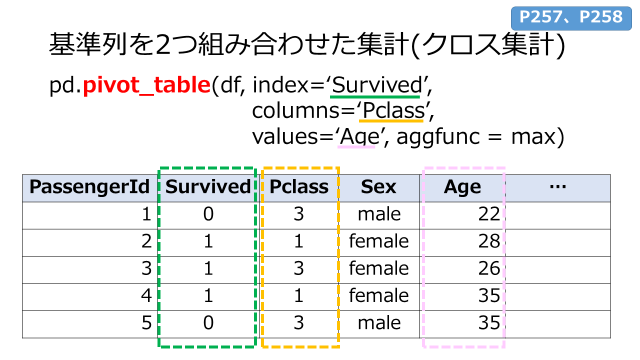

**問6**  


|Id|クラス|性別|点数|
|---:|:---:|:---:|---:|
|1|1組|男|10|
|2|1組|男|5|
|3|1組|女|15|
|4|2組|女|15|
|5|2組|女|20|
|6|2組|男|5|



(1) 上記の表で、「クラス」と「性別」を基準に、「点数」の平均を求めた場合、どのような結果になるか

* クラス[1]組の、性別[男]の平均は[7.5]点  
* クラス[1]組の、性別[女]の平均は[15]点  
* クラス[2]組の、性別[男]の平均は[5]点  
* クラス[2]組の、性別[女]の平均は[17.5]点  


コード7-15 ピボットテーブル機能を使う(P258)

In [ ]:
# Survived列とPclass列でクロス集計して、Age列の平均値を求める
# * 縦軸はSurvived列、横軸はPclass列とする
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age')

Pclass,1,2,3
Survived,,,
0,43.695312,33.544444,26.555556
1,35.368197,25.901566,20.646118


▶実行結果  
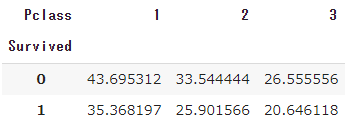

コード7-12 Age列の平均値と中央値を確認する(P254)

In [ ]:
print(df2['Age'].mean()) # 平均値の計算
print(df2['Age'].median()) # 中央値の計算

29.69911764705882
28.0


コード7-16 引数aggfuncを使って平均値以外の統計量を求める (P258) ★

In [ ]:
# Survived列とPclass列でクロス集計して、Age列の【最大値】を求める
pd.pivot_table(df2, index = 'Survived', columns = 'Pclass', values = 'Age', aggfunc = max)

Pclass,1,2,3
Survived,,,
0,71.0,70.0,74.0
1,80.0,62.0,63.0


▶実行結果  
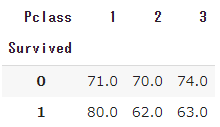

### 明示的な穴埋め

コード7-17 loc機能でAge列の欠損値を穴埋めする(P260) ★

穴埋めする値  
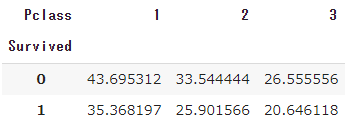

In [ ]:
# Pclass列、Survived列でクロス集計した結果を使って、df2のAge列の欠損値を穴埋めする

# df2のAge列が欠損値かどうかを示すシリーズを取得する（欠損だとTrue)
is_null = df2['Age'].isnull()

# Pclass=1でSurvived=0のdf2の欠損値への埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 0) & (is_null), 'Age'] = 43

# Pclass=1でSurvived=1のdf2の欠損値への埋め込み
df2.loc[(df2['Pclass'] == 1) & (df2['Survived'] == 1) & (is_null), 'Age'] = 35

# Pclass=2でSurvived=0のdf2の欠損値への埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 0) & (is_null), 'Age'] = 33

# Pclass=2でSurvived=1のdf2の欠損値への埋め込み
df2.loc[(df2['Pclass'] == 2) & (df2['Survived'] == 1) & (is_null), 'Age'] = 25

# Pclass=3でSurvived=0のdf2の欠損値への埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 0) & (is_null), 'Age'] = 26

# Pclass=3でSurvived=1のdf2の欠損値への埋め込み
df2.loc[(df2['Pclass'] == 3) & (df2['Survived'] == 1) & (is_null), 'Age'] = 20

## 再学習

コード7-18 learn関数を使ってモデルに再学習させる(P261)

In [ ]:
# 穴埋めしたdf2から、特徴量xと正解データtを抽出
x = df2[['Pclass','Age','SibSp','Parch','Fare']]
t = df2['Survived']


# for文を使い、木の深さを1～14まで変えながら、訓練データとテストデータの正解率の変化を確認する
for j in range(1, 15):
  # learn関数を呼び出し、訓練データでの正解率、テストデータでの正解率、学習済みモデルを取得する
  train_score, test_score , model = learn(x, t, depth = j)

  # 深さ、訓練データでの正解率、テストデータでの正解率を表示する
  print( "深さ{}:訓練データの正解率{} テストデータの正解率{}".format(j, train_score, test_score) )

深さ1:訓練データの正解率0.659 テストデータの正解率0.704
深さ2:訓練データの正解率0.699 テストデータの正解率0.67
深さ3:訓練データの正解率0.722 テストデータの正解率0.715
深さ4:訓練データの正解率0.74 テストデータの正解率0.704
深さ5:訓練データの正解率0.772 テストデータの正解率0.743
深さ6:訓練データの正解率0.813 テストデータの正解率0.799
深さ7:訓練データの正解率0.836 テストデータの正解率0.76
深さ8:訓練データの正解率0.854 テストデータの正解率0.765
深さ9:訓練データの正解率0.895 テストデータの正解率0.743
深さ10:訓練データの正解率0.913 テストデータの正解率0.726
深さ11:訓練データの正解率0.934 テストデータの正解率0.715
深さ12:訓練データの正解率0.951 テストデータの正解率0.737
深さ13:訓練データの正解率0.968 テストデータの正解率0.726
深さ14:訓練データの正解率0.973 テストデータの正解率0.721


▶実行結果  
深さ1:訓練データの正解率0.659 テストデータの正解率0.704  
深さ2:訓練データの正解率0.699 テストデータの正解率0.67  
深さ3:訓練データの正解率0.722 テストデータの正解率0.715  
深さ4:訓練データの正解率0.74 テストデータの正解率0.704  
深さ5:訓練データの正解率0.76 テストデータの正解率0.726  
深さ6:訓練データの正解率0.794 テストデータの正解率0.793  
深さ7:訓練データの正解率0.819 テストデータの正解率0.749  
深さ8:訓練データの正解率0.84 テストデータの正解率0.749  
深さ9:訓練データの正解率0.885 テストデータの正解率0.743  
深さ10:訓練データの正解率0.906 テストデータの正解率0.732  
深さ11:訓練データの正解率0.93 テストデータの正解率0.726  
深さ12:訓練データの正解率0.947 テストデータの正解率0.737  
深さ13:訓練データの正解率0.961 テストデータの正解率0.732  
深さ14:訓練データの正解率0.969 テストデータの正解率0.721


### ダミー変数化

「性別」も生死に関係があるのか？  
「性別」列を基準に、「Survived」列を集計して調べる。

In [ ]:
# 性別ごとの生存者(Survived列が1)を集計する
df2.groupby('Sex').sum()['Survived']

Sex
female    233
male      109
Name: Survived, dtype: int64

In [ ]:
df2['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

上記を整理すると

|性別|全体(人)|生存者(人)|
|:---:|---:|---:|
|男性|577|109|
|女性|314|233|

生存率 = 生存者の人数÷全体人数

|性別|生存率|
|:---:|---:|
|男性|0.189|
|女性|0.742|

女性の方が生存率が高い！

コード7-19 groupbyメソッドを使って平均値を求める(P263)

In [ ]:
# Sex列のデータの種類ごとに、Survived列の平均を求める　…　今回のデータの場合、これが「生存率」として扱える
survived_rate = df2.groupby('Sex').mean()['Survived']
survived_rate

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

コード7-20 plotメソッドで棒グラフを作成する(P263)

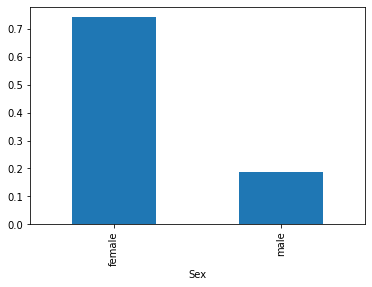

In [ ]:
survived_rate.plot(kind='bar')

Sex列は生死に影響がある様子。  
特徴量に加えたいが、**特徴量には文字列を含む列を指定できない**

**質的データを数値データに置き換える**  
**pd.get_dummies(data=置き換えるデータ, drop_first=●)**  

* **data** … シリーズ、データフレームを指定する
* **drop_first** … ダミー変数化後に最初の列を削除するならTrue、削除しないならFalseを指定する  

ダミー変数化した結果が返ってくるだけで、データフレーム自体は変更されない

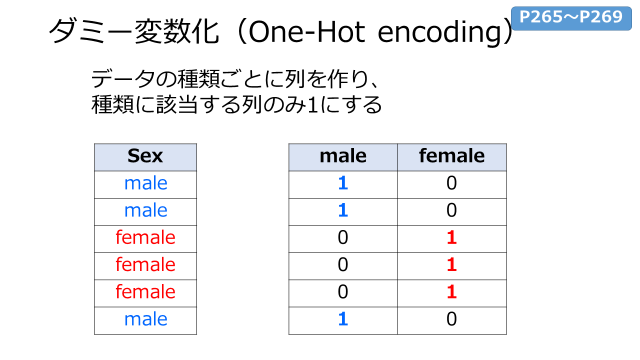

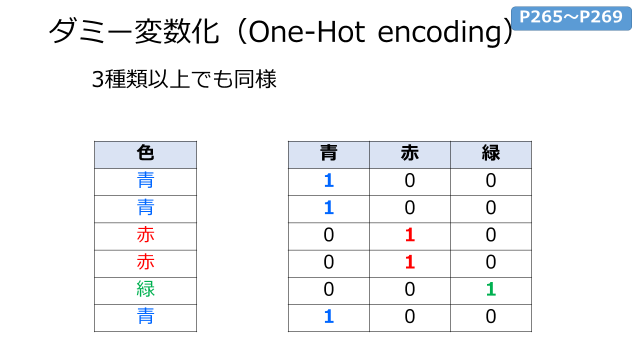

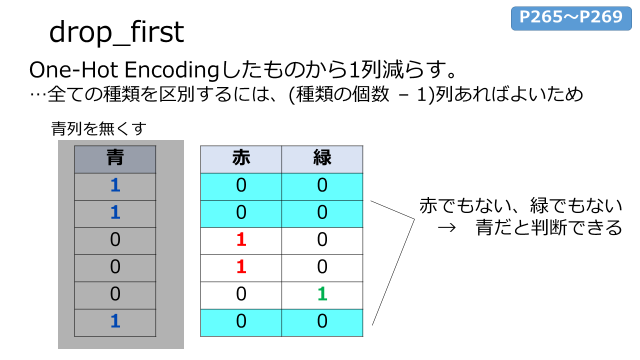

コード7-22 get_dummies関数で文字列を数値に変換する(P266) ★

In [ ]:
# df2のSex列をダミー変数化した結果を変数maleに代入する（先頭1列は削除する）
# male = pd.get_dummies(df2['Sex'], drop_first = True)
male = pd.get_dummies(df2['Sex'], drop_first = 'male')

# 結果の先頭5行を表示する
male.head()

,male
0,1
1,0
2,0
3,0
4,1


▶実行結果  
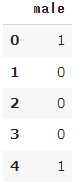

### データフレームの連結

**複数のデータフレームを連結する**  
**pd.concat(連結するデータフレームのリスト, axis=●)**

**axis**
* 0('index')：行を連結
* 1('column')：列を連結

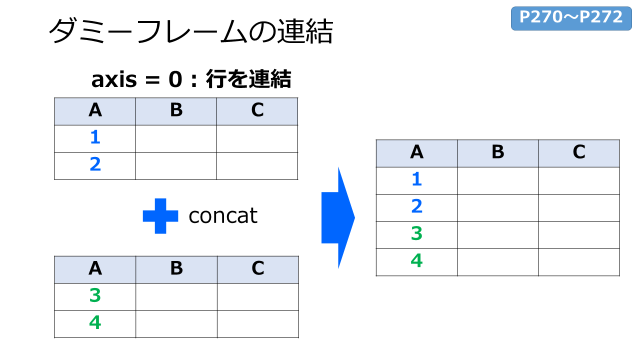

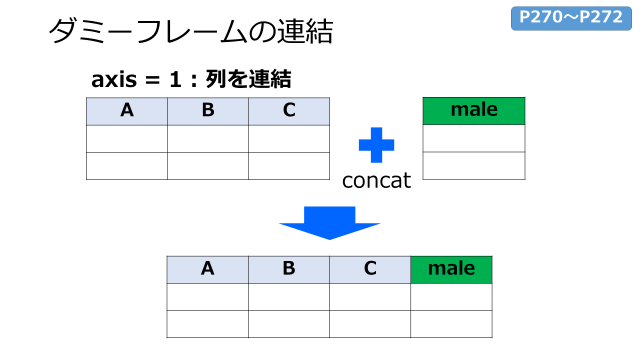

コード7-26 concat関数で2つのデータフレームを横方向に連結(P271)

In [ ]:
# 特徴量x と Sex列をダミー変数化した結果の変数male を、横方向に連結し、変数x_newに代入する
x_new = pd.concat( [x, male] , axis=1)

# 連結結果の先頭2行を表示する
x_new.head(2)

,Pclass,Age,SibSp,Parch,Fare,male
0,3,22.0,1,0,7.2500,1
1,1,38.0,1,0,71.2833,0


▶実行結果  
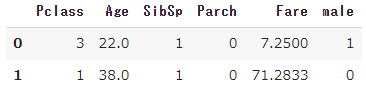

## モデルの再学習

コード7-28 モデルの再学習(P272)

In [ ]:
# for文を使い、木の深さを1～14まで変えながら、訓練データとテストデータの正解率の変化を確認する
for j in range(1, 15):
  # learn関数を呼び出し、訓練データでの正解率、テストデータでの正解率、学習済みモデルを取得する
  train_score, test_score , model = learn(x_new, t, depth = j)

  # 深さ、訓練データでの正解率、テストデータでの正解率を表示する
  print( "深さ{}:訓練データの正解率{} テストデータの正解率{}".format(j, train_score, test_score) )

深さ1:訓練データの正解率0.787 テストデータの正解率0.788
深さ2:訓練データの正解率0.792 テストデータの正解率0.782
深さ3:訓練データの正解率0.847 テストデータの正解率0.81
深さ4:訓練データの正解率0.854 テストデータの正解率0.849
深さ5:訓練データの正解率0.865 テストデータの正解率0.86
深さ6:訓練データの正解率0.879 テストデータの正解率0.855
深さ7:訓練データの正解率0.904 テストデータの正解率0.86
深さ8:訓練データの正解率0.916 テストデータの正解率0.894
深さ9:訓練データの正解率0.931 テストデータの正解率0.899
深さ10:訓練データの正解率0.958 テストデータの正解率0.888
深さ11:訓練データの正解率0.966 テストデータの正解率0.849
深さ12:訓練データの正解率0.973 テストデータの正解率0.844
深さ13:訓練データの正解率0.978 テストデータの正解率0.866
深さ14:訓練データの正解率0.985 テストデータの正解率0.849


コード7-29 学習したモデルを保存する(P273)

In [ ]:
# 特徴量x_new、正解データt、深さ9のモデルを再作成する
train_score, test_score , model = learn(x_new, t, depth = 9)
# train_score, test_score , model = learn(__空欄__)

# pickleをインポート
import pickle

# modelを'survived.pkl'という名前で保存する
with open('irismodel.pkl', 'wb') as f:
    pickle.dump(model, f)

# 7.5 決定木における特徴量の考察

**分類に影響を与える特徴量を調べる**
* 決定木のフローチャートで、上にある分岐条件を確認する
* **特徴量重要度**の指標を確認する

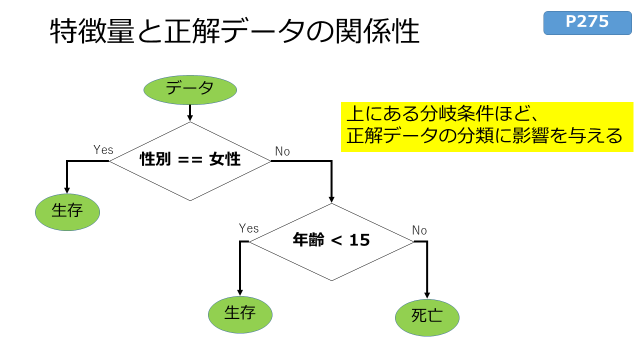

**特徴量重要度の取得**  
model**.feature_importances_**

コード7-30 feature\_importances\_で特徴最重要度を確認(P276)

In [ ]:
model.feature_importances_

array([0.08579131, 0.30302644, 0.05694219, 0.0093248 , 0.19298289,
       0.35193237])

コード7-31 特徴最重要度をデータフレームに変換して表示(P276)

In [ ]:
# 特徴量重要度のデータからデータフレームを作成し、インデックス名に 特徴量x_newの列名 を指定する
pd.DataFrame(model.feature_importances_, index = x_new.columns)

,0
Pclass,0.085791
Age,0.303026
SibSp,0.056942
Parch,0.009325
Fare,0.192983
male,0.351932
